 <h1><center><font size="6">CNN with Keras for Fashion MNIST</font></center></h1>


<img src="https://kaggle2.blob.core.windows.net/datasets-images/2243/3791/9384af51de8baa77f6320901f53bd26b/dataset-card.png" width="400"></img>


# <a id='0'>Content</a>

- <a href='#1'>Introduction</a>  
- <a href='#2'>Load packages</a>  
- <a href='#3'>Read the data</a>  
- <a href='#4'>Data exploration</a>
    - <a href='#41'>Class distribution</a>
    - <a href='#42'>Images samples</a>
- <a href='#5'>Model</a>  
    - <a href='#51'>Prepare the model</a>  
    - <a href='#52'>Train the model</a>  
    - <a href='#53'>Test prediction accuracy</a>   
    - <a href='#54'>Validation accuracy and loss</a>   
    - <a href='#55'>Add Dropout layers to the model</a>  
    - <a href='#56'>Re-train the model</a>   
    - <a href='#57'>Check validation accuracy and loss with the new model</a>    
    - <a href='#58'>Prediction accuracy with the new model </a>   
- <a href='#6'>Visualize the classified images</a>  
    - <a href='#61'>Correctly classified images</a>   
    - <a href='#62'>Incorrectly classified images</a>   
- <a href='#8'>References</a>

# <a id="1">Introduction</a>  


## Dataset

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.


## Content

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.   

Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.   


# <a id="2">Load packages</a>

In [1]:
import warnings

from IPython.display import SVG
from keras.datasets import fashion_mnist
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from keras.models import Sequential
from keras.utils import plot_model, to_categorical
from keras.utils.vis_utils import model_to_dot
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')
%matplotlib inline

Using TensorFlow backend.


## Parameters

In [2]:
# Some constants
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
TEST_SIZE = 0.2
RANDOM_STATE = 2018

# Model
NUM_EPOCHS = 10
BATCH_SIZE = 128

# <a id="3">Read the data</a>

There are 10 different classes of images, as following: 

* **0**: **T-shirt/top**;   
* **1**: **Trouser**;   
* **2**: **Pullover**;   
* **3**: **Dress**;
* **4**: **Coat**;
* **5**: **Sandal**;
* **6**: **Shirt**;
* **7**: **Sneaker**;
* **8**: **Bag**;
* **9**: **Ankle boot**.

Image dimmensions are **28**x**28**.   

The train set and test set are given in two separate sets.


In [3]:
(x_train_data, y_train_data), (x_test_data, y_test_data) = fashion_mnist.load_data()

# Create a dictionary for each type of label 
LABELS = {
    0 : "T-shirt/top", 
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot"
}

# <a id="4">Data exploration</a>

![](http://)The dimmension of the original  train,  test set are as following:

In [4]:
print("Fashion MNIST x_train shape: {}".format(x_train_data.shape))
print("Fashion MNIST y_train shape: {}".format(y_train_data.shape))
print("Fashion MNIST x_test shape: {}".format(x_test_data.shape))
print("Fashion MNIST y_test shape: {}".format(y_test_data.shape))

Fashion MNIST x_train shape: (60000, 28, 28)
Fashion MNIST y_train shape: (60000,)
Fashion MNIST x_test shape: (10000, 28, 28)
Fashion MNIST y_test shape: (10000,)


## <a id="41">Class distribution</a>

Let's see how many number of images are in each class. We start with the train set.

### Train set images class distribution

In [5]:
def get_classes_distribution(y_data):
    # Get the count for each label
    y = np.bincount(y_data)
    ii = np.nonzero(y)[0]
    label_counts = zip(ii, y[ii])

    # Get total number of samples
    total_samples = len(y_data)

    # Count the number of items in each class
    for label, count in label_counts:
        class_name = LABELS[label]
        percent = (count / total_samples) * 100
        print("{:<15s}:  {} or {:.2f}%".format(class_name, count, percent))
        
    return label_counts

train_label_counts = get_classes_distribution(y_train_data)

T-shirt/top    :  6000 or 10.00%
Trouser        :  6000 or 10.00%
Pullover       :  6000 or 10.00%
Dress          :  6000 or 10.00%
Coat           :  6000 or 10.00%
Sandal         :  6000 or 10.00%
Shirt          :  6000 or 10.00%
Sneaker        :  6000 or 10.00%
Bag            :  6000 or 10.00%
Ankle Boot     :  6000 or 10.00%


The classes are equaly distributed in the train set (10% each). Let's check the same for the test set.    
Let's also plot the class distribution.



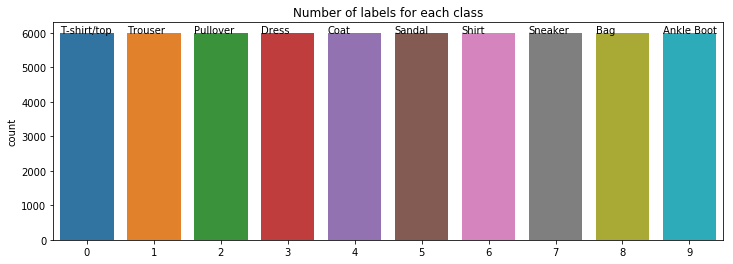

In [6]:
def plot_label_per_class(y_data):
    classes = sorted(np.unique(y_data))
    f, ax = plt.subplots(1,1, figsize=(12, 4))
    g = sns.countplot(y_data, order=classes)
    g.set_title("Number of labels for each class")
    
    for p, label in zip(g.patches, classes):
        g.annotate(LABELS[label], (p.get_x(), p.get_height() + 0.2))
    
    plt.show()
    
plot_label_per_class(y_train_data)

### Test set images class distribution

In [7]:
get_classes_distribution(y_test_data)

T-shirt/top    :  1000 or 10.00%
Trouser        :  1000 or 10.00%
Pullover       :  1000 or 10.00%
Dress          :  1000 or 10.00%
Coat           :  1000 or 10.00%
Sandal         :  1000 or 10.00%
Shirt          :  1000 or 10.00%
Sneaker        :  1000 or 10.00%
Bag            :  1000 or 10.00%
Ankle Boot     :  1000 or 10.00%


Also in the test set the 10 classes are equaly distributed (10% each).  

Lets' also plot the class distribution.

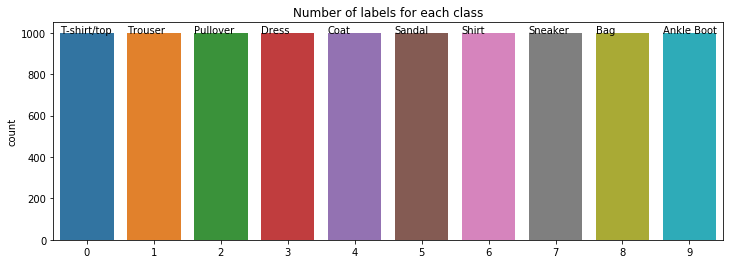

In [8]:
plot_label_per_class(y_test_data)

## <a id="42">Sample images</a>

### Train set images

Let's plot some samples for the images.   
We add labels to the train set images, with the corresponding fashion item category.  

In [9]:
def sample_images_data(x_data, y_data):
    # An empty list to collect some samples
    sample_images = []
    sample_labels = []

    # Iterate over the keys of the labels dictionary defined in the above cell
    for k in LABELS.keys():
        # Get four samples for each category
        samples = np.where(y_data == k)[0][:4]
        # Append the samples to the samples list
        for s in samples:
            img = x_data[s]
            sample_images.append(img)
            sample_labels.append(y_data[s])

    print("Total number of sample images to plot: ", len(sample_images))
    return sample_images, sample_labels

train_sample_images, train_sample_labels = sample_images_data(x_train_data, y_train_data)


Total number of sample images to plot:  40


Let's now plot the images.   
The labels are shown above each image.

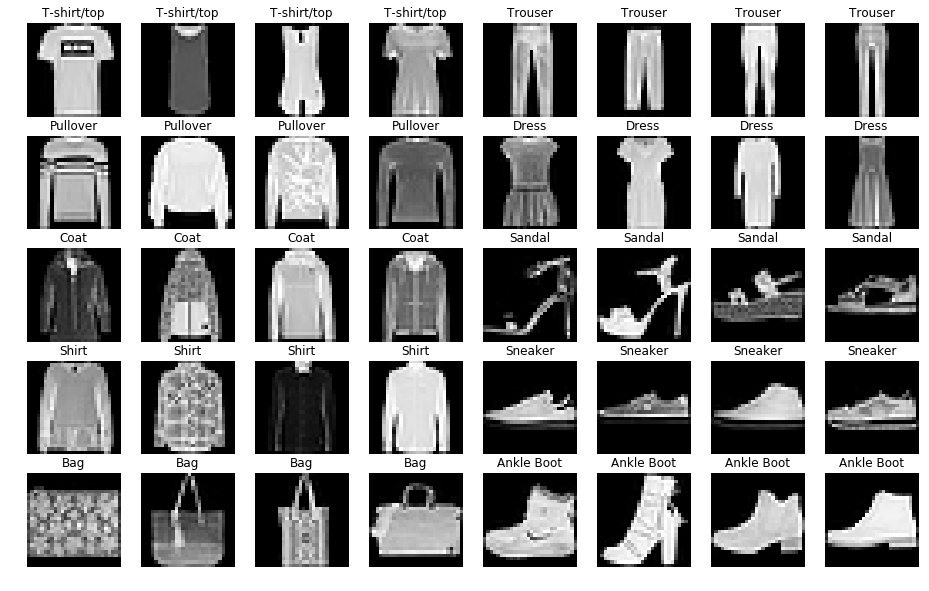

In [10]:
def plot_sample_images(data_sample_images, data_sample_labels, cmap="gray"):
    # Plot the sample images now
    f, ax = plt.subplots(5, 8, figsize=(16, 10))

    for i, img in enumerate(data_sample_images):
        ax[i//8, i%8].imshow(img, cmap=cmap)
        ax[i//8, i%8].axis('off')
        ax[i//8, i%8].set_title(LABELS[data_sample_labels[i]])
    plt.show()    
    
plot_sample_images(train_sample_images, train_sample_labels)

### Test set images

Let's plot now a selection of the test set images.  
Labels are as well added (they are known).  

Total number of sample images to plot:  40


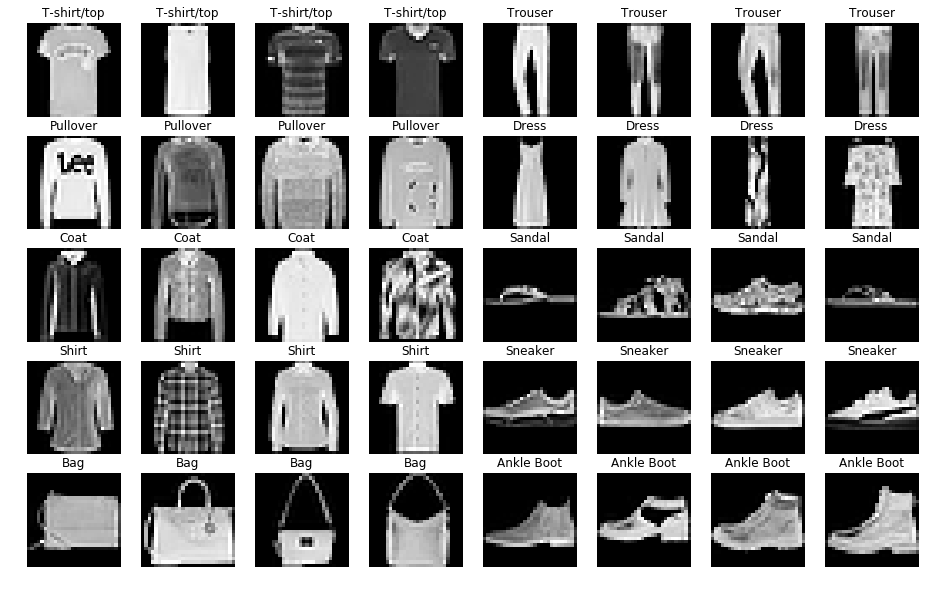

In [11]:
test_sample_images, test_sample_labels = sample_images_data(x_test_data, y_test_data)
plot_sample_images(test_sample_images, test_sample_labels)

# <a id="5">Model</a>

We start with preparing the model.

## <a id="51">Prepare the model</a>

## Data preprocessing

First we will do a data preprocessing to prepare for the model.

We save label (target) feature as a separate vector.

In [12]:
def data_preprocessing(x_data, y_data):
    out_y = to_categorical(y_data, len(np.unique(y_data)))
    num_images = x_data.shape[0]
    x_shaped_array = np.expand_dims(x_data, axis=-1)
    out_x = x_shaped_array / 255.
    
    return out_x, out_y


We process both the train_data and the test_data

In [13]:
# prepare the data
X, y = data_preprocessing(x_train_data, y_train_data)
X_test, y_test = data_preprocessing(x_test_data, y_test_data)


## Split train in train and validation set

We further split the train set in train and validation set. The validation set will be 20% from the original train set, therefore the split will be train/validation of 0.8/0.2.

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

print("Fashion MNIST X train  -  rows: {}  columns: {}".format(X_train.shape[0], X_train.shape[1:4]))
print("Fashion MNIST X valid  -  rows: {}  columns: {}".format(X_val.shape[0], X_val.shape[1:4]))
print("Fashion MNIST X test   -  rows: {}  columns: {}".format(X_test.shape[0], X_test.shape[1:4]))
print("-----------------------------------------------------------")
print("Fashion MNIST y train  -  rows: {}  columns: {}".format(y_train.shape[0], y_train.shape[1]))
print("Fashion MNIST y valid  -  rows: {}  columns: {}".format(y_val.shape[0], y_val.shape[1]))
print("Fashion MNIST y test   -  rows: {}  columns: {}".format(y_test.shape[0], y_test.shape[1]))

Fashion MNIST X train  -  rows: 48000  columns: (28, 28, 1)
Fashion MNIST X valid  -  rows: 12000  columns: (28, 28, 1)
Fashion MNIST X test   -  rows: 10000  columns: (28, 28, 1)
-----------------------------------------------------------
Fashion MNIST y train  -  rows: 48000  columns: 10
Fashion MNIST y valid  -  rows: 12000  columns: 10
Fashion MNIST y test   -  rows: 10000  columns: 10


Let's check the class inbalance for the rsulted training set.

T-shirt/top    :  4792 or 9.98%
Trouser        :  4770 or 9.94%
Pullover       :  4822 or 10.05%
Dress          :  4829 or 10.06%
Coat           :  4730 or 9.85%
Sandal         :  4806 or 10.01%
Shirt          :  4802 or 10.00%
Sneaker        :  4805 or 10.01%
Bag            :  4812 or 10.03%
Ankle Boot     :  4832 or 10.07%


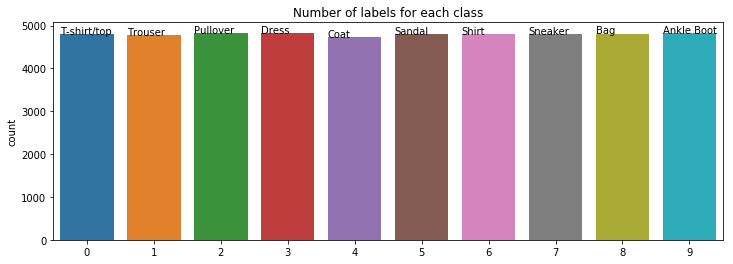

In [15]:
get_classes_distribution(np.argmax(y_train, axis=1))
plot_label_per_class(np.argmax(y_train, axis=1))


And, as well, for the validation set.

T-shirt/top    :  1208 or 10.07%
Trouser        :  1230 or 10.25%
Pullover       :  1178 or 9.82%
Dress          :  1171 or 9.76%
Coat           :  1270 or 10.58%
Sandal         :  1194 or 9.95%
Shirt          :  1198 or 9.98%
Sneaker        :  1195 or 9.96%
Bag            :  1188 or 9.90%
Ankle Boot     :  1168 or 9.73%


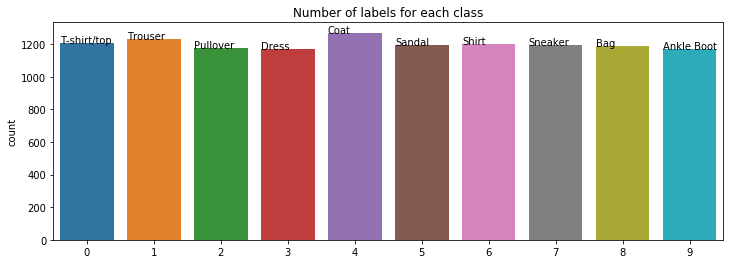

In [16]:
get_classes_distribution(np.argmax(y_val, axis=1))
plot_label_per_class(np.argmax(y_val, axis=1))


## <a id="52">Train the model</a>

### Build the model   



We will use a **Sequential** model.
* The **Sequential** model is a linear stack of layers. It can be first initialized and then we add layers using **add** method or we can add all layers at init stage. The layers added are as follows:

* **Conv2D** is a 2D Convolutional layer (i.e. spatial convolution over images). The parameters used are:
 * filters - the number of filters (Kernels) used with this layer; here filters = 32;
 * kernel_size - the dimmension of the Kernel: (3 x 3);
 * activation - is the activation function used, in this case `relu`;
 * kernel_initializer - the function used for initializing the kernel;
 * input_shape - is the shape of the image presented to the CNN: in our case is 28 x 28
 The input and output of the **Conv2D** is a 4D tensor.
 
* **MaxPooling2D** is a Max pooling operation for spatial data. Parameters used here are:
 * *pool_size*, in this case (2,2), representing the factors by which to downscale in both directions;
 
* **Conv2D** with the following parameters:
 * filters: 64;
 * kernel_size : (3 x 3);
 * activation : `relu`;
 
* **MaxPooling2D** with parameter:
 * *pool_size* : (2,2);

* **Conv2D** with the following parameters:
 * filters: 128;
 * kernel_size : (3 x 3);
 * activation : `relu`;
 
* **Flatten**. This layer Flattens the input. Does not affect the batch size. It is used without parameters;

* **Dense**. This layer is a regular fully-connected NN layer. It is used without parameters;
 * units - this is a positive integer, with the meaning: dimensionality of the output space; in this case is: 128;
 * activation - activation function : `relu`;
 
* **Dense**. This is the final layer (fully connected). It is used with the parameters:
 * units: the number of classes (in our case 10);
 * activation : `softmax`; for this final layer it is used `softmax` activation (standard for multiclass classification)
 

Then we compile the model, specifying as well the following parameters:
* *loss*;
* *optimizer*;
* *metrics*. 


In [17]:
# Model
model = Sequential()

# Add convolution 2D
model.add(Conv2D(
    16,
    kernel_size=(3, 3),
    activation='relu',
    kernel_initializer='he_normal',
    input_shape=(IMG_ROWS, IMG_COLS, 1)
))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(
    32, 
    kernel_size=(3, 3), 
    activation='relu'
))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(
    64,
    (3, 3),
    activation='relu'
))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy']
)

### Inspect the model

Let's check the model we initialized.

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

Let's also plot the model

In [19]:
#plot_model(model, to_file='model.png')
#SVG(model_to_dot(model).create(prog='dot', format='svg'))

### Run the model

We run the model with the training set. We are also using the validation set (a subset from the orginal training set) for validation.

In [20]:
train_model = model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1,
    validation_data=(X_val, y_val)
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 113us/step - loss: 0.6040 - acc: 0.7838 - val_loss: 0.4404 - val_acc: 0.8396
Epoch 2/10
48000/48000 [==============================] - 3s 59us/step - loss: 0.3885 - acc: 0.8605 - val_loss: 0.3551 - val_acc: 0.8735
Epoch 3/10
48000/48000 [==============================] - 3s 58us/step - loss: 0.3348 - acc: 0.8794 - val_loss: 0.3231 - val_acc: 0.8863
Epoch 4/10
48000/48000 [==============================] - 3s 58us/step - loss: 0.2996 - acc: 0.8914 - val_loss: 0.3051 - val_acc: 0.8936
Epoch 5/10
48000/48000 [==============================] - 3s 61us/step - loss: 0.2762 - acc: 0.8996 - val_loss: 0.2898 - val_acc: 0.8977
Epoch 6/10
48000/48000 [==============================] - 3s 60us/step - loss: 0.2618 - acc: 0.9041 - val_loss: 0.2975 - val_acc: 0.8932
Epoch 7/10
48000/48000 [==============================] - 3s 59us/step - loss: 0.2435 - acc: 0.9114 - val_loss: 0.2839 - val_ac

## <a id="53">Test prediction accuracy</a>

We calculate the test loss and accuracy.

In [21]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2868920865356922
Test accuracy: 0.8973


We evaluated the model accuracy based on the predicted values for the test set.  Let's check the validation value during training.

## <a id="53">Validation accuracy and loss</a>

Let's plot the train and validation accuracy and loss, from the train history.

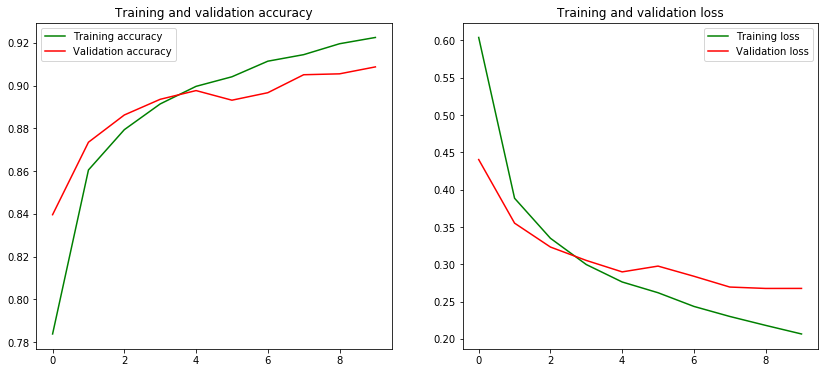

In [22]:
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['acc']
    val_acc = hist['val_acc']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = range(len(acc))
    f, ax = plt.subplots(1,2, figsize=(14,6))
    ax[0].plot(epochs, acc, 'g', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend()
    ax[1].plot(epochs, loss, 'g', label='Training loss')
    ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()
    plt.show()

plot_accuracy_and_loss(train_model)

The validation accuracy does not improve after few epochs and the validation loss is increasing after few epochs. This confirms our assumption that the model is overfitted. We will try to improve the model by adding Dropout layers.

## <a id="55">Add Dropout layers to the model</a>

We add several Dropout layers to the model, to help avoiding overfitting.    
Dropout is helping avoid overfitting in several ways, as explained in <a href='#8'>[6]</a> and <a href='#8'>[7]</a>.  


In [23]:
# Model
model = Sequential()

# Add convolution 2D
model.add(Conv2D(
    16,
    kernel_size=(3, 3),
    activation='relu',
    kernel_initializer='he_normal',
    input_shape=(IMG_ROWS, IMG_COLS, 1)
))
model.add(MaxPooling2D((2, 2)))
# Add dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(
    32, 
    kernel_size=(3, 3), 
    activation='relu'
))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(
    64,
    (3, 3),
    activation='relu'
))
# Add dropouts to the model
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.3))
model.add(Dense(NUM_CLASSES, activation='softmax'))


model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy']
)

## <a id="56">Re-train the model</a>

Let's inspect first the model.

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          18496     
__________

Let's also plot the model.

In [25]:
#plot_model(model, to_file='model.png')
#SVG(model_to_dot(model).create(prog='dot', format='svg'))

And now let's run the new model.

In [26]:
train_model = model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1,
    validation_data=(X_val, y_val)
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 76us/step - loss: 0.9300 - acc: 0.6612 - val_loss: 0.5294 - val_acc: 0.8042
Epoch 2/10
48000/48000 [==============================] - 3s 68us/step - loss: 0.5827 - acc: 0.7875 - val_loss: 0.4424 - val_acc: 0.8358
Epoch 3/10
48000/48000 [==============================] - 3s 67us/step - loss: 0.5131 - acc: 0.8141 - val_loss: 0.4029 - val_acc: 0.8540
Epoch 4/10
48000/48000 [==============================] - 3s 69us/step - loss: 0.4733 - acc: 0.8275 - val_loss: 0.3756 - val_acc: 0.8624
Epoch 5/10
48000/48000 [==============================] - 3s 72us/step - loss: 0.4422 - acc: 0.8395 - val_loss: 0.3434 - val_acc: 0.8745
Epoch 6/10
48000/48000 [==============================] - 3s 67us/step - loss: 0.4216 - acc: 0.8460 - val_loss: 0.3283 - val_acc: 0.8790
Epoch 7/10
48000/48000 [==============================] - 3s 67us/step - loss: 0.4033 - acc: 0.8521 - val_loss: 0.3157 - val_acc

## <a id="57">Prediction accuracy with the new model</a>

Let's re-evaluate the prediction accuracy with the new model.

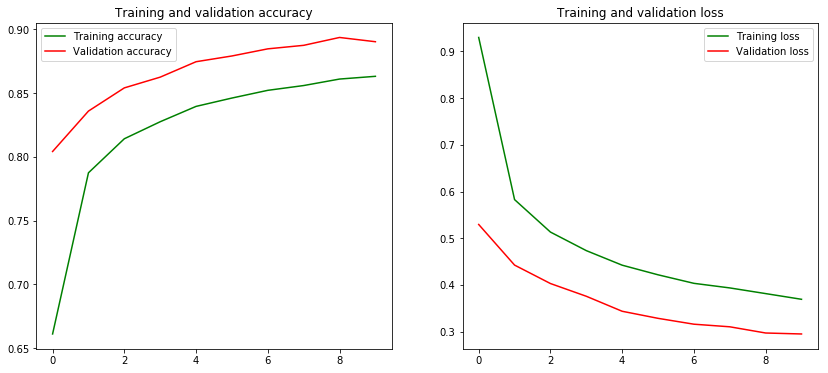

In [27]:
plot_accuracy_and_loss(train_model)

After adding the Dropout layers, the validation accuracy and validation loss are much better. Let's check now the prediction for the test set.


## <a id="58">Prediction accuracy with the new model</a>

Let's re-evaluate the test prediction accuracy with the new model.

In [28]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3122345961809158
Test accuracy: 0.8832


In [29]:
# get the predictions for the test data
predicted_classes = model.predict_classes(X_test)

In [30]:
p = predicted_classes
y = y_test_data
correct = np.nonzero(p == y)[0]
incorrect = np.nonzero(p != y)[0]

print("Correct predicted classes:", correct.shape[0])
print("Incorrect predicted classes:", incorrect.shape[0])

Correct predicted classes: 8832
Incorrect predicted classes: 1168


In [31]:
target_names = ["Class {} ({}) :".format(i, LABELS[i]) for i in range(NUM_CLASSES)]
print(classification_report(y_test_data, predicted_classes, target_names=target_names))

                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.78      0.90      0.84      1000
    Class 1 (Trouser) :       0.99      0.97      0.98      1000
   Class 2 (Pullover) :       0.81      0.86      0.84      1000
      Class 3 (Dress) :       0.90      0.87      0.89      1000
       Class 4 (Coat) :       0.83      0.77      0.80      1000
     Class 5 (Sandal) :       0.98      0.96      0.97      1000
      Class 6 (Shirt) :       0.67      0.61      0.64      1000
    Class 7 (Sneaker) :       0.92      0.98      0.95      1000
        Class 8 (Bag) :       0.98      0.96      0.97      1000
 Class 9 (Ankle Boot) :       0.97      0.94      0.96      1000

            avg / total       0.88      0.88      0.88     10000



Let's also inspect some of the images. We created two subsets of the predicted images set, correctly and incorrectly classified.

# <a id="6">Visualize classified images</a>

## <a id="61">Correctly classified images</a>


We visualize few images correctly classified.

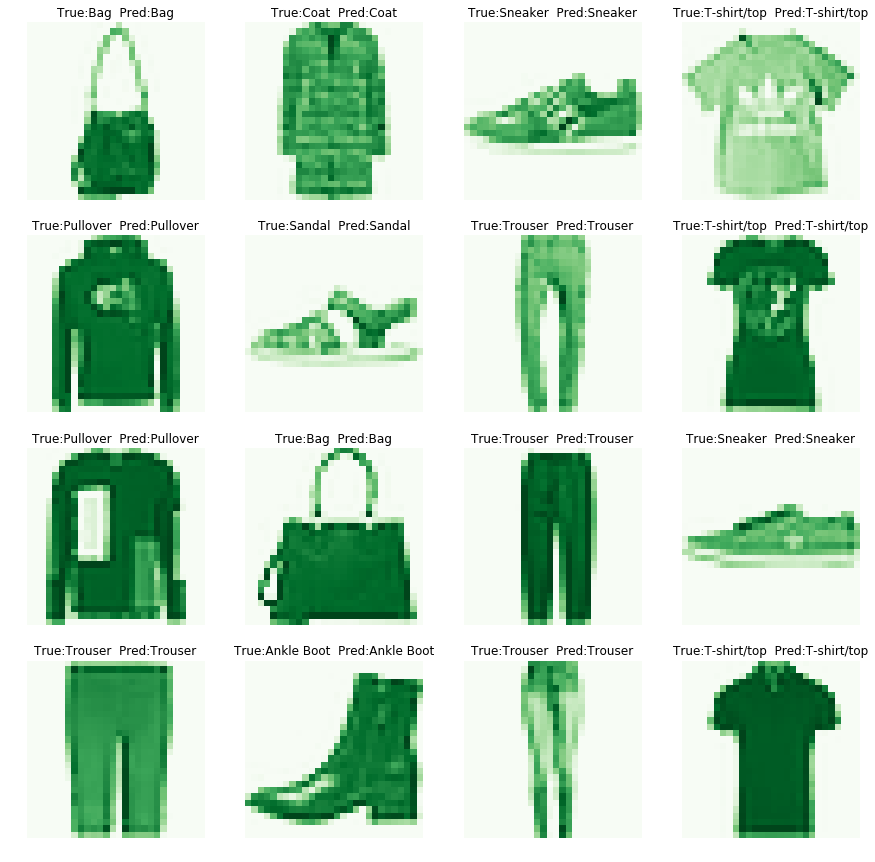

In [32]:
def plot_predicted_images(predictions, data_index, x_data, y_data, size=16, cmap="gray"):
    # Plot the sample images now
    f, ax = plt.subplots(4, 4, figsize=(15, 15))

    for i, indx in enumerate(np.random.choice(data_index, size=size, replace=False)):
        ax[i//4, i%4].imshow(x_data[indx].reshape(IMG_ROWS,IMG_COLS), cmap=cmap)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title("True:{}  Pred:{}".format(LABELS[y_data[indx]], LABELS[predicted_classes[indx]]))
    plt.show()    
    
plot_predicted_images(predicted_classes, correct, x_test_data, y_test_data, cmap="Greens")


## <a id="62">Incorrectly classified images</a>

Let's see also few images incorrectly classified.

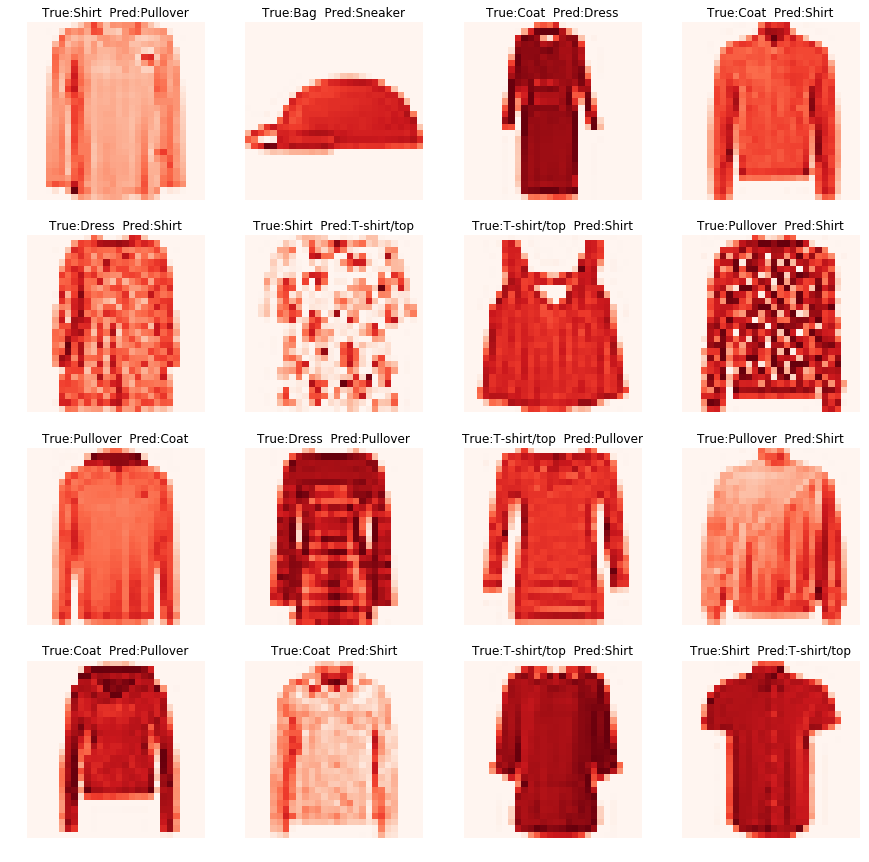

In [33]:
plot_predicted_images(predicted_classes, incorrect, x_test_data, y_test_data, cmap="Reds")

# <a id="8">References</a>

Original source: https://www.kaggle.com/gpreda/cnn-with-tensorflow-keras-for-fashion-mnist/notebook

[1] Fashion MNIST, An MNIST-like dataset of 70,000 28x28 labeled fashion images, https://www.kaggle.com/zalando-research/fashionmnist  
[2] DanB, CollinMoris, Deep Learning From Scratch, https://www.kaggle.com/dansbecker/deep-learning-from-scratch  
[3] DanB, Dropout and Strides for Larger Models, https://www.kaggle.com/dansbecker/dropout-and-strides-for-larger-models  
[4] BGO, CNN with Keras, https://www.kaggle.com/bugraokcu/cnn-with-keras    
[5] NAIN, EagerFMINST, https://www.kaggle.com/aakashnain/eagerfmnist  
[6] Why Dropounts prevent overfitting in Deep Neural Networks, https://medium.com/@vivek.yadav/why-dropouts-prevent-overfitting-in-deep-neural-networks-937e2543a701  
[7] Dropout: A Simple Way to Prevent Neural Networks from Overfitting, https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf